# Analys av Iris datasetet med Scikit-Learn
## Multi Layered Perceptron Classifier (MLPClassifier)
### Mål:
- Repetera Machine Learning: Scikit-Learn, plottning med Seaborn, Pandas etc
- Kolla om vi kan ***klassificera*** species i iris datasetet med hjälp av MLPclassifier.
- Det här är ett ***"Multi-Class Classification"*** problem, eftersom det finns tre olika species av Iris.
<br>
### Steg för steg:
- Läser in datasetet från Seaborn. OBS, samma dataset kan även importeras från SciKit-Learn, men då är X, y redan separerade (X=iris.data, y=iris.target)
- Läser in nödvändiga delar från sklearn:  
`from sklearn.model_selection import train_test_split`  
`from sklearn.metrics import accuracy_score, classification_report`  
`from sklearn.metrics import confusion_matrix`  
`from sklearn.neural_network import MLPClassifier`  
- Definierar X (oberoende variabler, features) och y (beroende variabel, target). Byter ut namnet på iris till 0, 1 eller 2 manuellt.  
`iris['species'] = iris['species'].replace({'setosa': 0, 'versicolor': 1, 'virginica': 2})`
- Definierar ett model-object:  
`mlp_clf = MLPClassifier(hidden_layer_sizes=(5,), activation='relu', max_iter=1000, random_state=42)`
- Tränar modellen med .fit  
`model.fit(X_train, y_train)`
- Använder den tränade modellen för att prediktera y_pred:  
`y_pred = model.predict(X_test)`
- Evaluerar modellen:  
`print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")`  
`print("Classification Report:")`  
`print(classification_report(y_test, y_pred))`  
- Visualiserar en Confusion Matrix med Seaborn
- Visualiserar nätverket med en funktion som ChatGPT skrev till mig...
## Noteringar / Lessons Learned
- Den förstår själv att den ska ha 4 inputs och 3 outputs. Man definierar bara hur många neurons man vill ha per hidden layer.
## Länkar:
- 

In [9]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from seaborn import load_dataset
import numpy as np
#sn.get_dataset_names() # list of available datasets

In [2]:
iris = load_dataset('iris') # load iris dataset as a pandas dataframe

In [4]:
pd.set_option('future.no_silent_downcasting', True) # to avoid warning on deprecated 'replace' method
iris['species'] = iris['species'].replace({'setosa': 0, 'versicolor': 1, 'virginica': 2})

# Define X and y
X = iris.drop(columns=['species'])
y = iris[['species']]

# Perform train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# convert y_train to 1D (numpy) array to avoid warning
if not isinstance(y_train, np.ndarray):
    y_train = y_train.values.ravel()
    y_train = y_train.astype(int) # make sure y_train is of type int

# convert y_test to 1D (numpy) array to avoid warning
if not isinstance(y_test, np.ndarray):
	y_test = y_test.values.ravel()
	y_test = y_test.astype(int) # make sure y_test is of type int

In [30]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the MLPClassifier
mlp_clf = MLPClassifier(hidden_layer_sizes=(5,), activation='relu', max_iter=1000, random_state=42)
mlp_clf.fit(X_train, y_train)

# Predict using the trained model
y_pred = mlp_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print predictions
print("Predictions:", y_pred)

Accuracy: 1.00
Predictions: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


c:\Users\danie\Documents\GitHub\Python-General-Learn\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy and Classification Report:

In [31]:
# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Confusin Matrix:

<Axes: >

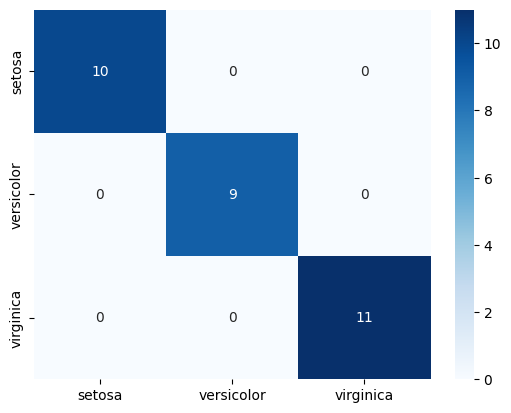

In [32]:
cm = confusion_matrix(y_test, y_pred)
sn.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['setosa', 'versicolor', 'virginica'], yticklabels=['setosa', 'versicolor', 'virginica'])

Visualisera det neurala nätverket:  
1. med en egen funktion

In [28]:
def plot_neural_network(layer_sizes):
    """Funktion för att visualisera det neurala nätverket"""
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # Define spacing between layers and nodes
    layer_spacing = 1.0
    node_spacing = 1.0
    max_nodes = max(layer_sizes)
    
    for i, layer_size in enumerate(layer_sizes):
        for j in range(layer_size):
            x = i * layer_spacing
            y = j * node_spacing - max_nodes / 2.0
            circle = plt.Circle((x, y), radius=0.1, fill=True, color='b')
            ax.add_artist(circle)
            plt.text(x, y + 0.1, f'L{i}-N{j}', ha='center') 
    
    ax.set_xlim(-1, len(layer_sizes))
    ax.set_ylim(-max_nodes, max_nodes)
    ax.axis('off')
    plt.title('Neural Network Visualization')
    plt.show()

In [33]:
# Get the layer sizes (input, hidden, and output)
layer_sizes = [mlp_clf.coefs_[0].shape[0]] + [coef.shape[1] for coef in mlp_clf.coefs_]

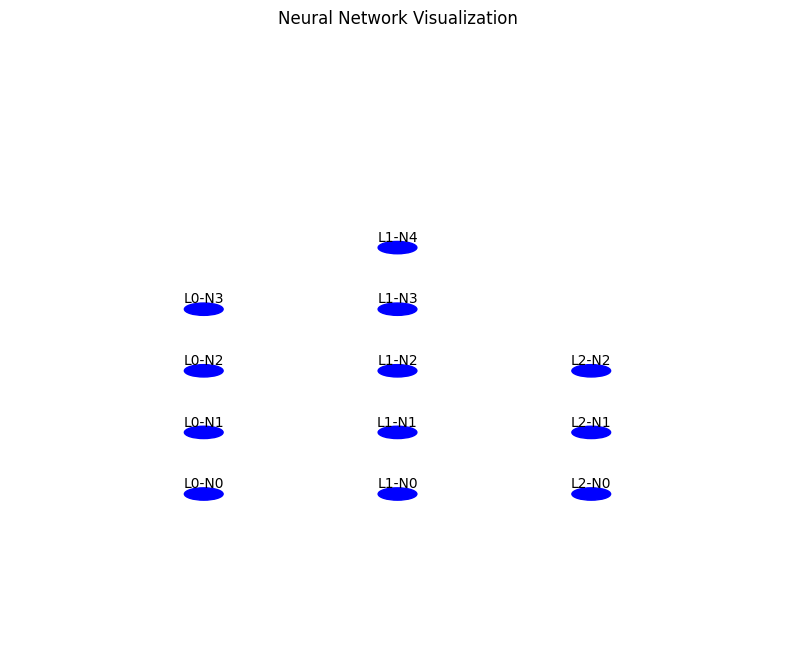

In [34]:
plot_neural_network(layer_sizes=layer_sizes)